In [1]:
# My custom class wherein are libraries like pandas ,mpl,np etc.
from preprocessor import *
from imblearn.over_sampling import SMOTE
prep = Preprocessor()

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
td = pd.concat([train,test],ignore_index=True,sort=False)

prep.overview(train)


Using TensorFlow backend.



Dataset contains 891 rows and 12 columns

Data types of the raw (uncleaned) data:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Categorical features of the dataset: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Numeric features of the dataset: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Checking for features with null values...

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


In [2]:
td.tail(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1279,1280,NaN,3,"Canavan, Mr. Patrick",male,21.0,0,0,364858,7.7500,NaN,Q
1280,1281,NaN,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.0750,NaN,S
1281,1282,NaN,1,"Payne, Mr. Vivian Ponsonby",male,23.0,0,0,12749,93.5000,B24,S
1282,1283,NaN,1,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",female,51.0,0,1,PC 17592,39.4000,D28,S
1283,1284,NaN,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,NaN,S
1284,1285,NaN,2,"Gilbert, Mr. William",male,47.0,0,0,C.A. 30769,10.5000,NaN,S
1285,1286,NaN,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,NaN,S
1286,1287,NaN,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18.0,1,0,13695,60.0000,C31,S
1287,1288,NaN,3,"Colbert, Mr. Patrick",male,24.0,0,0,371109,7.2500,NaN,Q
1288,1289,NaN,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.0,1,1,13567,79.2000,B41,C


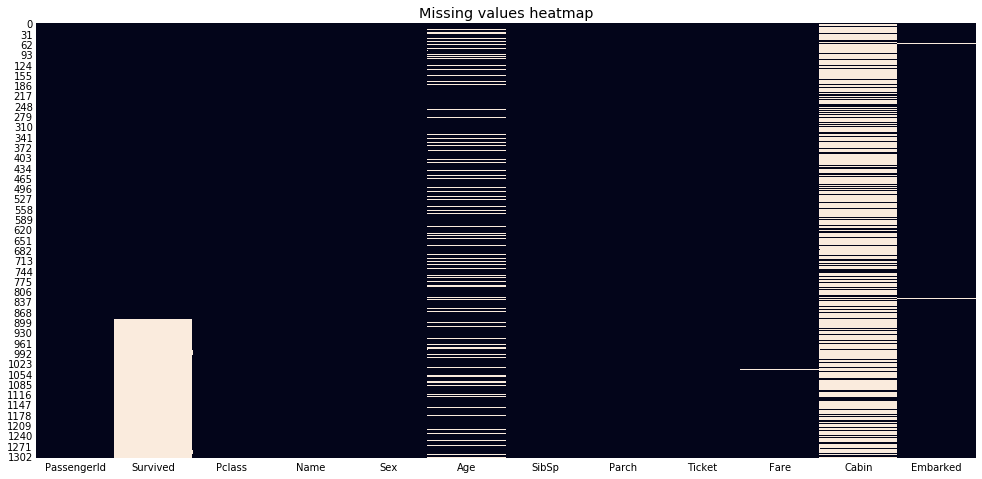

In [33]:
tn = td.isnull()
plt.figure(figsize=(15,8))
sns.heatmap(tn,cbar=False).set_title("Missing values heatmap");

In [3]:
td.Cabin = td.Cabin.fillna('NA')
td.Age = td.Age.fillna(td.Age.median())
td.Fare = td.Fare.fillna(td.Fare.median())
td.Embarked = td.Embarked.fillna(td.Embarked.mode()[0])
#td.Survived = td.Survived.astype(int)
print(td.isnull().sum())

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64


In [3]:
td['Family'] = td['SibSp'] + td['Parch']
td['is_alone'] = td['Family'] == 0

pre_y = td['Survived']
#pre_x = td.drop('Survived',axis= 1)
dm_x = pd.get_dummies(td)
#dm_y = pre_y.map(dict(Y=1, N=0))
dm_x.shape

(1309, 2436)

In [5]:
predicted = dm_x[dm_x.Survived.isnull()]
predicted = predicted.drop(['Survived'],axis=1)
#predicted = predicted.dropna()
predicted.isnull().sum()
predicted.shape

(418, 2436)

In [5]:
# Training data
tdata = dm_x.dropna()
label = tdata['Survived'].astype(int)
X = tdata.drop(['Survived'],axis=1)
X.shape

(714, 2435)

In [6]:
smote = SMOTE(ratio='minority')
# The label better be an int
X1, y = smote.fit_sample(X, label)
sc = MinMaxScaler()
X = sc.fit_transform(X1)
#testy = sc.fit_transform(testy)
#testy

In [7]:
#Dataset is balanced after applying smote algorithm
print(Counter(y))
y.dtype

Counter({0: 424, 1: 424})


dtype('int64')

In [8]:
X_train, X_test, y_train ,y_test = train_test_split(X, y, random_state= 42,test_size = 0.2)

In [30]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.svm import SVC
from keras import Sequential
from keras.layers import Dense
from collections import Counter


clf_A = LogisticRegression(solver='lbfgs',random_state = 42,multi_class='auto')
clf_B = SVC(random_state = 912,kernel = 'rbf',gamma = 'scale')
clf_C = RandomForestClassifier(n_estimators = 100,max_depth = 50,random_state=82)
clf_D = Sequential()
clf_D.add(Dense(200, activation = 'relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
clf_D.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
clf_D.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
clf_D.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
clf_D.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
clf_E = xgb.XGBClassifier(seed=82)

print('Logistic Regresssion...')
start  = time()
clf_A.fit(X_train, y_train)
end = time()
print('Trained model in {:3f} seconds...'.format(end - start))
y_pred_A = clf_A.predict(X_test)
# print classification report for logistic regression
print(f'Classification report for Logistic regression :\n{classification_report(y_test, y_pred_A)}')
print('')

print('Support Vector Machine...')
start  = time()
clf_B.fit(X_train, y_train)
end = time()
print('Trained model in {:3f} seconds...'.format(end - start))
y_pred_B = clf_B.predict(X_test)
# print classification report for support vector machine
print(f'Classification report for SVM :\n{classification_report(y_test, y_pred_B)}')
print('')

print('Random Forest...')
start = time()
clf_C.fit(X_train, y_train)
end = time()
print('Trained model in {:3f} seconds...'.format(end - start))
y_pred_C = clf_C.predict(X_test)
# print classification report for random forest
print(f'Classification report for Random Forest :\n{classification_report(y_test, y_pred_C)}')
print('')

print('Neural Network...')
start = time()
clf_D.fit(X_train, y_train, batch_size=21,epochs=100, verbose=0)
end = time()
print('Trained model in {:3f} seconds...'.format(end - start))
y_pred_D = clf_D.predict(X_test)
y_pred_D = (y_pred_D > 0.55)
# print classification report for neural network
print(f'Classification report for Neural network :\n{classification_report(y_test, y_pred_D)}')
print('')

print('XGBoost classifier...')
start = time()
clf_E.fit(X_train, y_train)
end = time()
print('Trained model in {:3f} seconds...'.format(end - start))
y_pred_E = clf_E.predict(X_test)
# print classification report for random forest
print(f'Classification report for XGBoost classifier :\n{classification_report(y_test, y_pred_E)}')
print('')


Logistic Regresssion...
Trained model in 0.205649 seconds...
Classification report for Logistic regression :
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       103
           1       0.86      0.92      0.89       117

    accuracy                           0.88       220
   macro avg       0.88      0.87      0.88       220
weighted avg       0.88      0.88      0.88       220


Support Vector Machine...
Trained model in 2.321337 seconds...
Classification report for SVM :
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       103
           1       0.92      0.86      0.89       117

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220


Random Forest...
Trained model in 0.533694 seconds...
Classification report for Random Forest :
              precision    recall  f1-score 

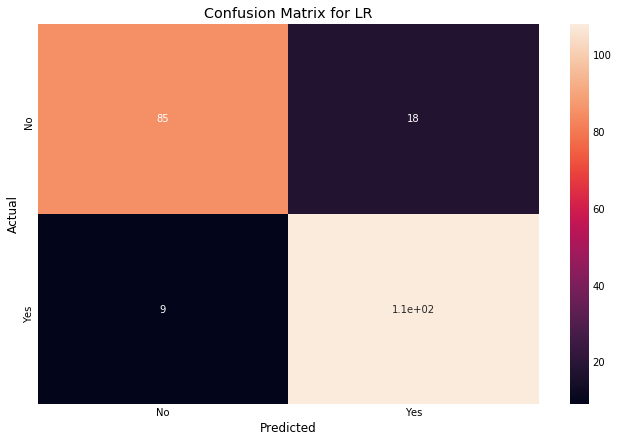

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_A)
plt.figure(figsize=(10,7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax =ax); #annot= True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix for LR');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No','Yes']);


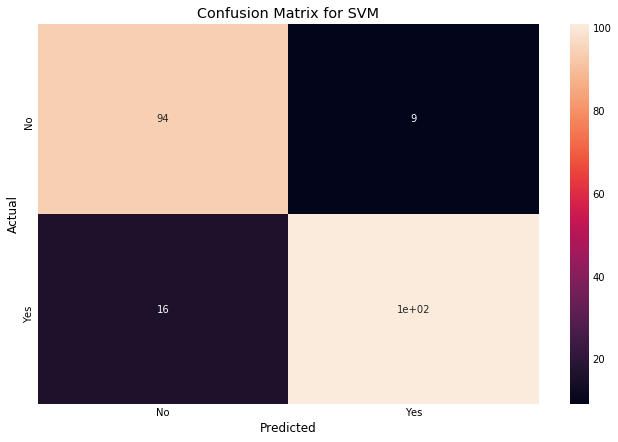

In [24]:

cm = confusion_matrix(y_test,y_pred_B)
plt.figure(figsize=(10,7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax =ax); #annot= True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix for SVM');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No','Yes']);


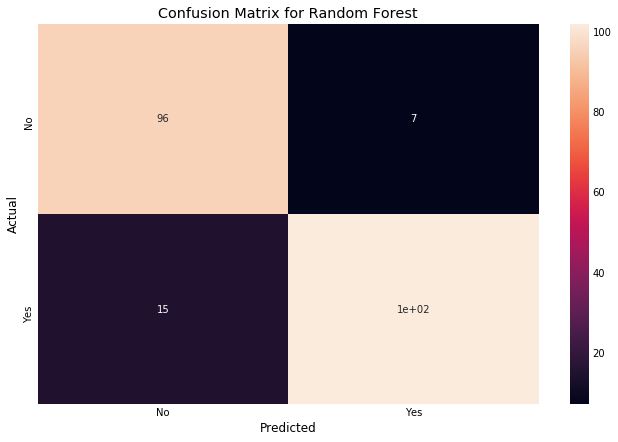

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_C)
plt.figure(figsize=(10,7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax =ax); #annot= True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix for Random Forest');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No','Yes']);


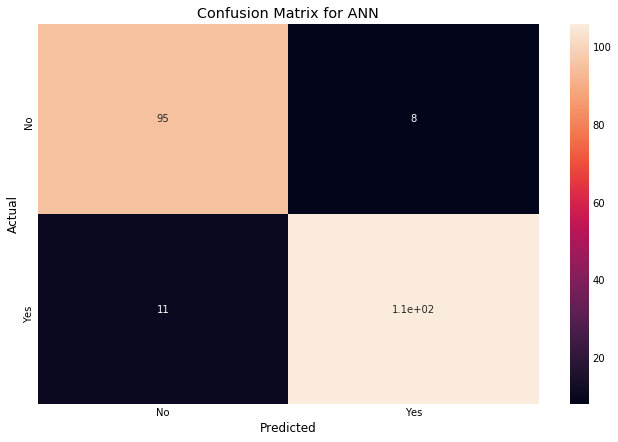

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_D)
plt.figure(figsize=(10,7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax =ax); #annot= True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix for ANN');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No','Yes']);


In [27]:
predictions = clf_C.predict(predicted)
#predictions = (predictions > 0.5)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
val= pd.DataFrame(predictions, columns=['Survived'])
val = val.replace({True: 1, False: 0})
val.head()


,Survived
0,0
1,0
2,0
3,0
4,0


In [17]:
val= pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})
test = test.reset_index()
#val = val.replace({1: 'Survived', False: 'Drowned'})
filename = 'titanicPredictionsRF.csv'
val.to_csv(filename,index=False)
print(f'Saved file: {filename}')

Saved file: titanicPredictionsRF.csv


In [18]:
x = pd.read_csv(filename,index_col=0)

In [19]:
x.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [20]:
x.shape

(418, 1)

In [21]:
x['Survived'].value_counts()

0    340
1     78
Name: Survived, dtype: int64